In [1]:
install_libraries = False # default: True
graphs_on =  False        # default: True
find_best_model = False   # default: True
wraper_method = False     # default: True

## Index
* [EDA](#EDA)
  * [General Exploration](#General-Exploration)
  * [Numerical Features](#Numerical-Features)
    * [Looking for Outliers](#Looking-for-Outliers)
  * [Categorial Features](#Categorial-Features)
  * [Conclusions](#Conclusions)
* [Transforming and Cleaning the Data](#Transforming-and-Cleaning-the-Data)
  * [Correcting Grammar Errors](#Correcting-Grammar-Errors)
  * [Removing Outliers](#Removing-Outliers)
  * [Transforming Categorical Data](#Transforming-Categorical-Data)
  * [Balancing the Data](#Balancing-the-Data)
  * [Select Relevant Features](#Select-Relevant-Features)
* [Training Model](#Training-Model)
  * [Logistic Regression](#Logistic-Regression)
  * [Random Forest Classifier](#Random-Forest-Classifier)
  * [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
* [Submitting Results](#Submitting-Results)

# EDA
## General Exploration
[Index](#Index)

Start by giving a general look at the features. Let's see if there is some relevant information.

[`profiling`](https://docs.profiling.ydata.ai/latest/getting-started/installation/)

In [2]:
import sys

if install_libraries:
    !{sys.executable} -m pip install -U ydata-profiling[notebook]
    !jupyter nbextension enable --py widgetsnbextension

In [3]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('/kaggle/input/arm-proceso-de-evaluacin-ds/base_train.csv')

if graphs_on:
    profile = ProfileReport(df, title="Pandas Profiling Report")
    profile.to_notebook_iframe()

In [4]:
categorical_list = df.select_dtypes(include=['object']).columns.to_list()
numerical_list = df.select_dtypes(exclude=['object']).columns.to_list()

print("categorical list: ",categorical_list)
print("numerical list: ", numerical_list)

categorical list:  ['TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO', 'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES', 'RESULT_PREVIO']
numerical list:  ['ID', 'EDAD', 'CAMPANA', 'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC', 'ACEPTACION']


In [5]:
import seaborn as sns
if graphs_on:
    sns.set_theme(style="ticks")
    sns.pairplot(df[numerical_list],hue="ACEPTACION")

## Numerical Features
[Index](#Index)

In this part we take a look at the numerical data. The idea here is to see the distribution of the features and see if some important information can be extracted.

[`seaborn.displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) 
[`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

In [6]:
import matplotlib.pyplot as plt

if graphs_on:
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

    for ax, variable in zip(axes.flatten(), numerical_list):
        sns.kdeplot(data=df, x=variable,ax=ax,  hue="ACEPTACION")
        ax.tick_params(axis='x', rotation=45)

    fig.subplots_adjust(hspace=.5)

### Looking for Outliers
[Index](#Index)

Here we search for outliers in the numerical features. After the analysis it is clear that there are outliers. The features that have outliers are `EDAD`, `CAMPANA`, `ICC`, and `INGRESO`

[`Outlier`](https://en.wikipedia.org/wiki/Outlier)
[`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
[`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [7]:
if graphs_on:
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

    for ax, variable in zip(axes.flatten(), numerical_list):
        sns.boxplot(x=df[variable], ax=ax)
        ax.tick_params(axis='x', rotation=45)

    fig.subplots_adjust(hspace=1)

## Categorial Features
[Index](#Index)

[`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
[`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [8]:
if graphs_on:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

    for ax, variable in zip(axes.flatten(), categorical_list):
        sns.histplot(data=df, x=variable, ax=ax,  hue="ACEPTACION", multiple="stack")
        ax.tick_params(axis='x', rotation=45)

    fig.subplots_adjust(hspace=.7)

In [9]:
zeros = 27944 
ones = 3534

print("for every '1', there are",zeros/ones,"'0'.")

for every '1', there are 7.907187323146576 '0'.


In [10]:
for i in df["ESTADO_CIVIL"].value_counts().keys():
    print(f"\"{i}\"")
    
print()

for i in df["EDUCACION"].value_counts().keys():
    print(f"\"{i}\"")

"married"
"single"
"divorced"
" married"
"unknown"
"singgle "
"marrid"
"divorced "
"single "
"d_ivorced"

"university.degree"
"high.school"
"basic.9y"
"professional.course"
"basic.4y"
"basic.6y"
"unknown"
"illiterate"


## Conclusions
[Index](#Index)
* There are people who are over 120 years old. It should not be posible and should be removed.
* There are 9 categorical columns (`TRABAJO`, `ESTADO_CIVIL`, `EDUCACION`, `INCUMPLIMIENTO`, `VIVIENDA`, `PRESTAMO`, `TIPO_CONTACTO`, `MES`, `RESULT_PREVIO`)
* There are 12 numerical columns (`ID`, `EDAD`, `CAMPANA`, `NRO_DIAS_CONTACTO`, `CONTACTOS_PREVIOS`, `TASA_VAR_EMP`, `IPC`, `ICC`, `INGRESO`, `MONTO_DEUDA`, `MONTO_TRANSAC`, `ACEPTACION`)
* the target value is `ACEPTACION`
* Exploring the numerical features, we found outliers (`EDAD`, `CAMPANA`, `ICC`, and `INGRESO`)
* The feature `ACEPTACION` is umbalanced. For every `1`, there are 7.91 `0`.
* `ESTADO_CIVIL` has labels that need to be fixed: 
    * "married" "marrid" " married"
    * "single" "singgle " "single "
    * "divorced" "divorced " "d_ivorced"

# Transforming and Cleaning the Data
[Index](#Index)

To organize the data, we will separate de dataframe in categorical and numerical (`categorical_df` and `numerical_df`).

In [11]:
categorical_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(exclude=['object'])

display(categorical_df.head(2))
display(numerical_df.head(2))

,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,RESULT_PREVIO
0,self-employed,single,university.degree,no,no,no,telephone,aug,nonexistent
1,technician,single,professional.course,no,no,no,telephone,aug,nonexistent


,ID,EDAD,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
0,24004,27,1,999,0,-0.1,93.798,-40.4,1285.0,24260.77053,5242.101608,0
1,24003,43,1,999,0,-0.1,93.798,-40.4,1287.0,28980.09457,5538.942316,0


## Correcting Grammar Errors
[Index](#Index)

In [12]:
def solve_grammar_issues(label):
    if label == "marrid" or label ==" married":
        return "married"
    if label == "singgle " or label =="single ":
        return "single"
    if label == "divorced " or label =="d_ivorced":
        return "divorced"
    if label == "basic.4y" or label == "basic.6y" or label == "basic.9y":
        return "basic"
    else:
        return label

    
categorical_df["ESTADO_CIVIL"] = categorical_df["ESTADO_CIVIL"].apply(solve_grammar_issues)
categorical_df["EDUCACION"] = categorical_df["EDUCACION"].apply(solve_grammar_issues)

display(categorical_df["ESTADO_CIVIL"].value_counts())
print()
display(categorical_df["EDUCACION"].value_counts())

ESTADO_CIVIL
married     19111
single       8797
divorced     3508
unknown        62
Name: count, dtype: int64

EDUCACION
basic                  9617
university.degree      9266
high.school            7228
professional.course    4035
unknown                1315
illiterate               17
Name: count, dtype: int64

## Removing Outliers
[Index](#Index)

In this part we will remove all outliers. After that, we will check all boxplots and see if the outliers were removed. All changes will be applied to the `numerical_df`

In [13]:
# function that receives a series type, remove outlier and returns the modified series.
def removeOutliers(ser):
    Q1=ser.quantile(.25)
    Q3=ser.quantile(.75)
    IQR=Q3-Q1
    lower = float(Q1-IQR*1.5)
    upper = float(Q3+IQR*1.5)

    def modify_value(value):
        if(value<lower):
            return float(lower)
        elif(upper<value):
            return float(upper)
        else:
            return float(value)

    return ser.apply(modify_value)

# apply outliers
for i in numerical_df.columns:
    if i == "ACEPTACION":
        print("Do not apply outlier to the target feature:",i)
    elif i =="CONTACTOS_PREVIOS" or i=="NRO_DIAS_CONTACTO":
        print("There is no need of removing outliers in this feature:",i)
    else:
        numerical_df[i] = removeOutliers(numerical_df[i])
        
# plot boxes and see if the data changed after removing outliers
if graphs_on:
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

    for ax, variable in zip(axes.flatten(), numerical_df.columns):
        sns.boxplot(x=numerical_df[variable], ax=ax)
        ax.tick_params(axis='x', rotation=45)

    fig.subplots_adjust(hspace=1)

There is no need of removing outliers in this feature: NRO_DIAS_CONTACTO
There is no need of removing outliers in this feature: CONTACTOS_PREVIOS
Do not apply outlier to the target feature: ACEPTACION


## Transforming Categorical Data
[Index](#Index)

Now, lets convert the categorical data into numerical data. This step is important since the model receives only numbers as input and not text. The function that perform this task is `transform_categorical_values`. After that we use the function `join_dataframes` to join both, `numerical_df` and `categorical_df` dataframes.


[`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [14]:
def transform_categorical_values(categorical_df):    
    # convert caterorical to numerical
    categorical_df = pd.get_dummies(categorical_df, drop_first=True, dtype=float)
    return categorical_df

categorical_df = transform_categorical_values(categorical_df)
categorical_df.head(2)

,TRABAJO_blue-collar,TRABAJO_entrepreneur,TRABAJO_housemaid,TRABAJO_management,TRABAJO_retired,TRABAJO_self-employed,TRABAJO_services,TRABAJO_student,TRABAJO_technician,TRABAJO_unemployed,...,MES_dec,MES_jul,MES_jun,MES_mar,MES_may,MES_nov,MES_oct,MES_sep,RESULT_PREVIO_nonexistent,RESULT_PREVIO_success
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
def join_dataframes(numerical_df, categorical_df):
    # join caterical df with numerical
    transformed_df = pd.concat([numerical_df, categorical_df], axis=1)
    return transformed_df

converted_df = join_dataframes(numerical_df, categorical_df)
converted_df.head(2)

,ID,EDAD,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,...,MES_dec,MES_jul,MES_jun,MES_mar,MES_may,MES_nov,MES_oct,MES_sep,RESULT_PREVIO_nonexistent,RESULT_PREVIO_success
0,24004.0,27.0,1.0,999,0,-0.1,93.798,-40.4,1285.0,24260.77053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24003.0,43.0,1.0,999,0,-0.1,93.798,-40.4,1287.0,28980.09457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Balancing the Data
[Index](#Index)

In order to balance the data, we will use the *imbalanced-learn* library. We will use the SMOTE method.

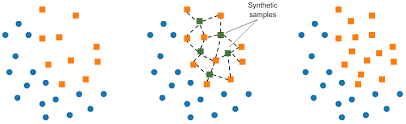

[`imbalanced-learn.org/stable/install`](https://imbalanced-learn.org/stable/install.html#getting-started)
[`over_sampling.SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#)

In [16]:
if install_libraries:
    !pip install imbalanced-learn

In [17]:
X = converted_df.drop('ACEPTACION', axis=1)
y = converted_df['ACEPTACION']

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

## Select Relevant Features
[Index](#Index)

In order to select the relevant features, we will use two method:

* **filter method (Pearson correlation)**: From the filter method, we the features with the most high correlation number are:
    * `ID`
    * `TASA_VAR_EMP` 
    * `INGRESO` 
    * `ACEPTACION` 
    
We will discard `ID`, `ACEPTACION` 
* **wrapper method (RFE sklearn)**: from the wrapper method we get
    * `ID`
    * `CAMPANA` 
    * `ESTADO_CIVIL_married`
    * `EDUCACION_university.degree`
    * `VIVIENDA_yes`

We will discard `ID`

[`RFE`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
[`youtube`](https://www.youtube.com/watch?v=EqLBAmtKMnQ)
[`Correlation_feature_selection`](https://en.wikipedia.org/wiki/Feature_selection#Correlation_feature_selection)

In [18]:
correlation_serie = join_dataframes(X,pd.DataFrame(y)).corr()["ACEPTACION"]
threshold = 0.4
correlation_serie[(correlation_serie<=-threshold) | (threshold<=correlation_serie)]

ID              0.447742
TASA_VAR_EMP   -0.438500
INGRESO         0.476133
ACEPTACION      1.000000
Name: ACEPTACION, dtype: float64

In [19]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

if wraper_method:
    estimator = GradientBoostingClassifier()
    selector = RFE(estimator, n_features_to_select=5, step=1,verbose=10)
    selector = selector.fit(X, y)

    for i,j in zip(selector.support_,X.columns):
        if i == True:
            print(f'"{j}",')

In [20]:
X = X[[
    "CAMPANA",
    "ESTADO_CIVIL_married",
    "EDUCACION_university.degree",
    "VIVIENDA_yes",
    "INGRESO",
    "TASA_VAR_EMP"
]]

# Training Model
[Index](#Index)

First, we are going to split our original dataframe (`df`, now `X` and `y`) in train and test. The function `finding_best_parameters` returns the model that best performs according to the parameters given to the function. We will try the following models and which one perform the best.
* LogisticRegression 
* RandomForestClassifier
* GradientBoostingClassifier

[`make_scorer`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)
[`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
[`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
[`putting_together`](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)
[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.metrics import roc_auc_score, make_scorer

def gini_score(y, y_pred):
    auc = roc_auc_score(y, y_pred)
    return 2 * auc - 1

gini_scorer = make_scorer(gini_score, needs_proba=True)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def finding_best_parameters(model,param_grid):
    # Define a pipeline to search for the best combination of PCA truncation
    # and classifier regularization.
    pca = PCA()
    # Define a Standard Scaler to normalize inputs
    scaler = StandardScaler()

    # set the tolerance to a large value to make the example faster
    # pipe = Pipeline(steps=[("scaler", scaler), ("model", model)])
    pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("model", model)])

    # Parameters of pipelines can be set using '__' separated parameter names:

    search = GridSearchCV(pipe, param_grid,scoring="roc_auc_ovr_weighted",verbose=5) # gini_scorer
    search.fit(X_train, y_train)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

    return search.best_estimator_

## Logistic Regression
[Index](#Index)

[`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [24]:
from sklearn.linear_model import LogisticRegression

if find_best_model:
    parameters = {
         "model__C": [0.001, 0.01,1], # best: 0.01
        "model__penalty":["l2"]       # best: "l2"
    }
    model = LogisticRegression(max_iter=1000)
    finding_best_parameters(model,parameters)

## Random Forest Classifier
[Index](#Index)

[`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [25]:
from sklearn.ensemble import RandomForestClassifier

if find_best_model:
    parameters = {
        'model__max_depth':[2,3,5,10],            # best: 10
        'model__random_state':[0,10],             # best: 10
        'model__n_estimators': [200,500]          # best: 500
    }
    model = RandomForestClassifier()
    finding_best_parameters(model,parameters)

## Gradient Boosting Classifier
[Index](#Index)

[`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

if find_best_model:
    parameters = {
        'model__n_estimators':[100,300],    # best: 300
        'model__learning_rate':[0.001,0.1], # best: 0.1
        'model__max_depth':[1,3],           # best: 3
        'model__random_state':[0]           # best: 0
    }
    model = GradientBoostingClassifier()
    finding_best_parameters(model,parameters)
    
    
parameters = {
    'model__n_estimators':[300],
    'model__learning_rate':[0.1],
    'model__max_depth':[3],
    'model__random_state':[42] 
}
    
model = GradientBoostingClassifier()
clf = finding_best_parameters(model,parameters)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__random_state=42;, score=0.949 total time=  24.4s
[CV 2/5] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__random_state=42;, score=0.946 total time=  24.7s
[CV 3/5] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__random_state=42;, score=0.945 total time=  24.5s
[CV 4/5] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__random_state=42;, score=0.947 total time=  24.1s
[CV 5/5] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__random_state=42;, score=0.947 total time=  24.5s
Best parameter (CV score=0.947):
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__random_state': 42}


# Submitting Results
[Index](#Index)

Finally, lets transform the `base_test_x.csv` file to dataframe and feed it into the selected model. After that, we store the expected result in the `output.csv` file.

In [27]:
test_df = pd.read_csv('/kaggle/input/arm-proceso-de-evaluacin-ds/base_test_x.csv')

# Transforming and Cleaning the Data
categorical_test_df = test_df.select_dtypes(include=['object'])
numerical_test_df = test_df.select_dtypes(exclude=['object'])

## Correcting Grammar Errors
categorical_test_df["ESTADO_CIVIL"] = categorical_test_df["ESTADO_CIVIL"].apply(solve_grammar_issues)
categorical_test_df["EDUCACION"] = categorical_test_df["EDUCACION"].apply(solve_grammar_issues)

## Transforming Categorical Data
categorical_test_df = transform_categorical_values(categorical_test_df)
converted_test_df = join_dataframes(numerical_test_df, categorical_test_df)

## Select Relevant Features
converted_test_df = converted_test_df[[
    "CAMPANA",
    "ESTADO_CIVIL_married",
    "EDUCACION_university.degree",
    "VIVIENDA_yes",
    "INGRESO",
    "TASA_VAR_EMP"
]]

converted_test_df.head(2)

,CAMPANA,ESTADO_CIVIL_married,EDUCACION_university.degree,VIVIENDA_yes,INGRESO,TASA_VAR_EMP
0,1,1.0,0.0,0.0,1419.000000,-0.1
1,1,0.0,0.0,1.0,1207.534814,1.4


In [28]:
test_df["ACEPTACION"] = pd.Series([i[1] for i in clf.predict_proba(converted_test_df)])
test_df[["ID","ACEPTACION"]].to_csv('output.csv', index=False)
test_df[["ID","ACEPTACION"]].head(2)

,ID,ACEPTACION
0,24001,0.382257
1,18923,0.083007
